# EDA COURSE PROJECT


# Data science student championship

# Team Details

In [85]:
import pandas as pd
import numpy as np
import datapurifier as dp
from datapurifier import Mleda, Nlpeda, Nlpurifier, MlReport
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

print(dp.__version__)

0.3.5


In [86]:
data=[{'Name':'Amaan Khan','Roll No':240,'USN':'01FE21BCS212'},{'Name':'Adwait S','Roll No':241,'USN':'01FE21BCS222'},{'Name':'Poorva Khatawate','Roll No':248,'USN':'01FE21BCS302'},
     {'Name':'Shubhashri Shetty','Roll No':249,'USN':'01FE21BCS143'}]
details=pd.DataFrame(data)
details

,Name,Roll No,USN
0,Amaan Khan,240,01FE21BCS212
1,Adwait S,241,01FE21BCS222
2,Poorva Khatawate,248,01FE21BCS302
3,Shubhashri Shetty,249,01FE21BCS143


In [87]:
India_test=pd.read_csv('India_test.csv')

In [88]:
India_train=pd.read_csv('India_train.csv')
submission=pd.read_csv('submission.csv')
USA_train=pd.read_csv('USA_train.csv')
USA_test=pd.read_csv('USA_test.csv')
USA_Commodity_prices=pd.read_csv('USA_Commodity_prices.csv')

In [89]:
India_soil_rainfall_30years=pd.read_csv('India_soil_rainfall_30years.csv')

In [90]:
India_train

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE SHARE IN NPK (Percent),PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha)
0,1990,Andhra Pradesh,Srikakulam,0.0,0.0,0,4.05,50.75,75.34,18.87,...,23.32,19.79,15.90,1383.0,NaN,5.79,4.21,41684.0,85.21,67.77
1,1990,Andhra Pradesh,Visakhapatnam,7.0,3.0,3333,NaN,54.03,94.67,12.21,...,18.24,15.43,11.63,1363.0,4.03,5.67,3.11,44809.0,90.08,73.74
2,1990,Andhra Pradesh,East Godavari,49.0,238.0,4944,3.28,39.90,68.64,8.12,...,19.69,48.41,32.27,7882.0,6.86,19.71,13.31,NaN,303.24,194.95
3,1990,Andhra Pradesh,West Godavari,26.0,120.0,4964,4.14,43.94,48.83,5.39,...,NaN,89.59,64.73,18271.0,14.01,42.18,33.22,165898.0,375.97,266.35
4,1990,Andhra Pradesh,Krishna,996.0,289.0,2892,1.18,NaN,32.47,2.26,...,28.12,77.62,53.68,NaN,13.34,29.04,21.79,139778.0,NaN,193.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4700,2006,West Bengal,Jalpaiguri,0.0,0.0,0,0.00,8.68,48.92,284.72,...,33.77,44.20,25.52,11421.0,27.03,35.01,24.74,43874.0,133.67,80.70
4701,2006,West Bengal,Darjeeling,0.0,0.0,0,0.00,9.32,67.40,288.60,...,24.83,64.10,48.93,6477.0,NaN,48.47,34.63,42436.0,301.08,224.49
4702,2006,West Bengal,Malda,NaN,0.0,0,0.00,4.68,16.49,48.28,...,25.88,108.35,58.66,20547.0,25.82,99.19,53.77,94166.0,446.42,241.29
4703,2006,West Bengal,Cooch Behar,0.0,0.0,0,0.00,7.62,31.35,248.95,...,28.63,42.16,22.97,8003.0,25.74,33.22,18.43,35189.0,144.73,74.27


In [91]:
India_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4705 entries, 0 to 4704
Columns: 103 entries, Year to TOTAL PER HA OF GCA (Kg per ha)
dtypes: float64(99), int64(2), object(2)
memory usage: 3.7+ MB


In [92]:
India_train.describe()

,Year,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),MAY PERCIPITATION (Millimeters),JUNE PERCIPITATION (Millimeters),...,PHOSPHATE SHARE IN NPK (Percent),PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha)
count,4705.000000,4438.000000,4477.000000,4705.000000,4489.000000,4458.000000,4445.000000,4485.000000,4491.000000,4471.000000,...,4486.000000,4470.000000,4471.000000,4481.000000,4479.000000,4449.000000,4467.000000,4440.000000,4443.000000,4474.000000
mean,1998.025292,655.725327,501.854367,1929.775133,18.153555,16.186774,21.222115,27.203142,52.273295,155.832713,...,27.947414,30.861284,22.573136,4415.581790,11.750246,13.755383,10.851428,49886.029955,122.181330,85.892845
std,4.893509,2294.044035,1623.216667,4919.725762,25.831879,27.118176,28.666592,47.434857,91.043304,193.457432,...,9.687258,24.060465,15.257428,6241.924452,10.083136,17.368442,12.656153,46381.811515,102.637837,63.090648
min,1990.000000,-9.000000,-9.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.230000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1994.000000,0.000000,0.000000,0.000000,3.190000,2.910000,3.680000,4.140000,7.560000,56.620000,...,21.710000,14.270000,11.455000,428.000000,4.660000,4.060000,3.600000,16024.250000,50.250000,39.305000
50%,1998.000000,4.000000,0.000000,0.000000,8.480000,6.830000,10.140000,8.820000,17.730000,102.990000,...,27.080000,25.240000,19.920000,1881.000000,8.030000,7.450000,6.060000,39157.500000,92.010000,72.000000
75%,2002.000000,225.750000,117.000000,2353.000000,23.830000,17.642500,28.630000,28.150000,55.685000,186.505000,...,33.360000,40.567500,30.440000,5749.000000,16.065000,16.520000,13.300000,69162.500000,169.365000,121.525000
max,2006.000000,39702.000000,22694.000000,66671.000000,235.750000,292.430000,247.210000,636.600000,763.050000,3251.370000,...,95.260000,226.120000,143.030000,50904.000000,94.270000,253.760000,226.540000,375992.000000,826.060000,612.130000


In [93]:
India_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2476 entries, 0 to 2475
Columns: 103 entries, Year to TOTAL PER HA OF GCA (Kg per ha)
dtypes: float64(99), int64(2), object(2)
memory usage: 1.9+ MB


In [94]:
India_train.describe()

,Year,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),MAY PERCIPITATION (Millimeters),JUNE PERCIPITATION (Millimeters),...,PHOSPHATE SHARE IN NPK (Percent),PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha)
count,4705.000000,4438.000000,4477.000000,4705.000000,4489.000000,4458.000000,4445.000000,4485.000000,4491.000000,4471.000000,...,4486.000000,4470.000000,4471.000000,4481.000000,4479.000000,4449.000000,4467.000000,4440.000000,4443.000000,4474.000000
mean,1998.025292,655.725327,501.854367,1929.775133,18.153555,16.186774,21.222115,27.203142,52.273295,155.832713,...,27.947414,30.861284,22.573136,4415.581790,11.750246,13.755383,10.851428,49886.029955,122.181330,85.892845
std,4.893509,2294.044035,1623.216667,4919.725762,25.831879,27.118176,28.666592,47.434857,91.043304,193.457432,...,9.687258,24.060465,15.257428,6241.924452,10.083136,17.368442,12.656153,46381.811515,102.637837,63.090648
min,1990.000000,-9.000000,-9.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.230000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1994.000000,0.000000,0.000000,0.000000,3.190000,2.910000,3.680000,4.140000,7.560000,56.620000,...,21.710000,14.270000,11.455000,428.000000,4.660000,4.060000,3.600000,16024.250000,50.250000,39.305000
50%,1998.000000,4.000000,0.000000,0.000000,8.480000,6.830000,10.140000,8.820000,17.730000,102.990000,...,27.080000,25.240000,19.920000,1881.000000,8.030000,7.450000,6.060000,39157.500000,92.010000,72.000000
75%,2002.000000,225.750000,117.000000,2353.000000,23.830000,17.642500,28.630000,28.150000,55.685000,186.505000,...,33.360000,40.567500,30.440000,5749.000000,16.065000,16.520000,13.300000,69162.500000,169.365000,121.525000
max,2006.000000,39702.000000,22694.000000,66671.000000,235.750000,292.430000,247.210000,636.600000,763.050000,3251.370000,...,95.260000,226.120000,143.030000,50904.000000,94.270000,253.760000,226.540000,375992.000000,826.060000,612.130000


In [95]:
USA_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              400 non-null    int64  
 1   State                                             380 non-null    object 
 2   Planted (1000 Acres)                              386 non-null    object 
 3   Harvested (1000 Acres)                            385 non-null    object 
 4   Yield (Pounds/ Harvested Area)                    400 non-null    int64  
 5   Average Temperature Value                         366 non-null    float64
 6   Average Temperature Anomaly                       379 non-null    float64
 7   Maximum Temperature Value                         368 non-null    float64
 8   Maximum Temperature Anomaly                       379 non-null    float64
 9   Minimum Temperature V

In [96]:
USA_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 25 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Year                                              560 non-null    int64  
 1   State                                             528 non-null    object 
 2   Planted (1000 Acres)                              537 non-null    object 
 3   Harvested (1000 Acres)                            540 non-null    object 
 4   Yield (Pounds/ Harvested Area)                    560 non-null    int64  
 5   Average Temperature Value                         532 non-null    float64
 6   Average Temperature Anomaly                       529 non-null    float64
 7   Maximum Temperature Value                         538 non-null    float64
 8   Maximum Temperature Anomaly                       527 non-null    float64
 9   Minimum Temperature V

In [97]:
USA_test.describe()

,Year,Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,Precipitation Value,Precipitation Anomaly,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
count,400.000000,400.0,366.000000,379.000000,368.000000,379.000000,384.000000,376.000000,384.000000,377.000000,...,369.000000,381.000000,377.000000,382.000000,374.000000,368.000000,386.000000,374.000000,369.000000,381.000000
mean,2012.500000,0.0,62.814822,3.054617,74.599207,3.117458,51.070095,3.250421,5.846424,2.682011,...,274.178862,-9.844488,2.517796,2.110089,2.537433,2.125546,2.358085,2.266889,2.472035,2.358780
std,5.773503,0.0,5.282566,1.595499,5.080334,1.720398,5.931185,1.541782,1.769862,1.215335,...,108.818445,24.752921,2.588490,2.387040,2.678072,2.502230,2.446377,2.304705,1.541536,1.446587
min,2003.000000,0.0,50.566667,-0.983333,63.075000,-0.733333,37.825000,-0.600000,1.546667,-0.499167,...,40.583333,-86.833333,-4.756667,-4.596667,-3.881667,-4.300000,-4.665833,-3.385000,-1.122500,-1.115000
25%,2007.750000,0.0,58.806250,1.845833,70.989583,1.887500,47.189583,2.166667,4.739792,1.803333,...,198.833333,-26.166667,0.535833,0.402708,0.562292,0.350000,0.626667,0.594167,1.290833,1.209167
50%,2012.500000,0.0,62.895833,3.083333,74.779167,3.008333,50.754167,3.220833,6.001667,2.768333,...,269.416667,-9.000000,2.708333,2.202083,2.563333,2.029583,2.589167,2.520833,2.578333,2.410833
75%,2017.250000,0.0,66.616667,4.225000,78.337500,4.416667,55.527083,4.291667,7.114167,3.663333,...,351.166667,6.833333,4.304167,3.860833,4.603958,3.919167,4.097500,4.058958,3.666667,3.372500
max,2022.000000,0.0,77.183333,7.450000,87.225000,8.600000,67.075000,6.900000,9.695833,5.686667,...,601.000000,80.166667,8.705833,7.722500,8.434167,8.335000,8.021667,7.087500,6.048333,5.998333


In [98]:
USA_train.describe()

,Year,Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,Precipitation Value,Precipitation Anomaly,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
count,560.000000,560.000000,532.000000,529.000000,538.000000,527.000000,533.000000,534.000000,533.000000,539.000000,...,535.000000,530.000000,534.000000,536.000000,530.000000,538.000000,530.000000,538.000000,530.000000,539.000000
mean,1988.500000,538.010714,61.607221,2.016005,73.572878,2.121837,49.818261,1.996941,5.882753,2.530091,...,294.366199,11.006761,2.778761,2.626225,2.795374,2.584857,2.776687,2.657643,2.656437,2.563550
std,8.084969,321.951007,5.325217,1.521716,5.155871,1.597006,5.732206,1.587296,1.741681,1.223086,...,113.144409,25.100424,2.209194,2.132811,2.347275,2.399436,2.170548,2.209566,1.364614,1.398117
min,1975.000000,0.000000,50.108333,-1.683333,60.683333,-1.958333,36.300000,-2.416667,1.520000,-0.113333,...,37.000000,-87.250000,-3.079167,-2.780833,-2.623333,-3.364167,-2.972500,-3.124167,-0.697500,-0.665000
25%,1981.750000,370.000000,57.487500,0.850000,69.691667,1.045833,46.058333,0.779167,4.832500,1.569583,...,216.125000,-6.125000,1.188542,1.122292,1.233333,0.900000,1.370000,1.160625,1.660625,1.479583
50%,1988.500000,547.000000,61.475000,2.100000,73.591667,2.141667,49.558333,1.933333,5.925000,2.504167,...,287.416667,11.041667,2.792083,2.527917,2.791250,2.560000,2.740000,2.430833,2.595417,2.683333
75%,1995.250000,716.000000,65.400000,3.133333,77.381250,3.241667,53.875000,3.116667,7.217500,3.527083,...,379.666667,27.729167,4.152292,3.885208,4.312500,4.247917,4.145208,4.190625,3.605417,3.566250
max,2002.000000,1470.000000,75.550000,5.866667,86.608333,6.575000,64.791667,6.733333,10.623333,5.207500,...,598.333333,79.500000,9.797500,9.265000,9.635833,10.426667,10.410000,11.182500,6.330833,7.102500


In [99]:
India_soil_rainfall_30years.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 17 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   State Name                               313 non-null    object
 1   Dist Name                                313 non-null    object
 2   SOIL TYPE PERCENT (Percent)              310 non-null    object
 3   Year_Rainfall                            313 non-null    object
 4   JANUARY NORMAL RAINFALL (Millimeters)    313 non-null    int64 
 5   FEBRUARY NORMAL RAINFALL (Millimeters)   313 non-null    int64 
 6   MARCH NORMAL RAINFALL (Millimeters)      313 non-null    int64 
 7   APRIL NORMAL RAINFALL (Millimeters)      313 non-null    int64 
 8   MAY NORMAL RAINFALL (Millimeters)        313 non-null    int64 
 9   JUNE NORMAL RAINFALL (Millimeters)       313 non-null    int64 
 10  JULY NORMAL RAINFALL (Millimeters)       313 non-null    int64

In [100]:
India_soil_rainfall_30years.describe()

,JANUARY NORMAL RAINFALL (Millimeters),FEBRUARY NORMAL RAINFALL (Millimeters),MARCH NORMAL RAINFALL (Millimeters),APRIL NORMAL RAINFALL (Millimeters),MAY NORMAL RAINFALL (Millimeters),JUNE NORMAL RAINFALL (Millimeters),JULY NORMAL RAINFALL (Millimeters),AUGUST NORMAL RAINFALL (Millimeters),SEPTEMBER NORMAL RAINFALL (Millimeters),OCTOBER NORMAL RAINFALL (Millimeters),NOVEMBER NORMAL RAINFALL (Millimeters),DECEMBER NORMAL RAINFALL (Millimeters),ANNUAL NORMAL RAINFALL (Millimeters)
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,19.319489,17.485623,19.958466,26.840256,53.603834,168.709265,313.715655,274.261981,185.028754,82.722045,30.591054,12.293930,1204.571885
std,19.869288,18.544661,25.841508,41.326173,79.142011,167.118879,181.808910,128.288743,78.454477,70.420414,53.261921,23.337337,636.098733
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,6.000000,5.000000,7.000000,4.000000,11.000000,77.000000,203.000000,175.000000,137.000000,37.000000,5.000000,3.000000,813.000000
50%,14.000000,14.000000,12.000000,12.000000,18.000000,124.000000,302.000000,285.000000,185.000000,58.000000,13.000000,5.000000,1079.000000
75%,24.000000,22.000000,22.000000,31.000000,57.000000,185.000000,366.000000,342.000000,229.000000,110.000000,29.000000,10.000000,1391.000000
max,146.000000,141.000000,192.000000,365.000000,440.000000,982.000000,1106.000000,765.000000,537.000000,379.000000,458.000000,239.000000,3667.000000


In [101]:
India_train.isnull().sum()

Year                                  0
State Name                            0
Dist Name                             0
COTTON AREA (1000 ha)               267
COTTON PRODUCTION (1000 tons)       228
                                   ... 
POTASH PER HA OF NCA (Kg per ha)    256
POTASH PER HA OF GCA (Kg per ha)    238
TOTAL CONSUMPTION (tons)            265
TOTAL PER HA OF NCA (Kg per ha)     262
TOTAL PER HA OF GCA (Kg per ha)     231
Length: 103, dtype: int64

In [102]:
avg_dec_max=India_train['DECEMBER MAXIMUM (Centigrate)'].astype('float').mean(axis=0)
India_train['DECEMBER MAXIMUM (Centigrate)'].replace(np.nan,avg_dec_max,inplace=True)
India_train['DECEMBER MAXIMUM (Centigrate)']

0       29.63
1       27.84
2       29.51
3       31.89
4       33.63
        ...  
4700    30.62
4701    26.49
4702    30.45
4703    29.69
4704    30.53
Name: DECEMBER MAXIMUM (Centigrate), Length: 4705, dtype: float64

In [103]:
avg_jan_deficit=India_train['JANUARY WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['JANUARY WATER DEFICIT (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
India_train['JANUARY WATER DEFICIT (Millimeters)']

0       68.96
1       64.07
2       64.94
3       73.01
4       69.48
        ...  
4700    42.91
4701    43.34
4702    44.69
4703    41.76
4704    56.62
Name: JANUARY WATER DEFICIT (Millimeters), Length: 4705, dtype: float64

In [104]:
avg_jan_deficit=India_train['FEBRUARY WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['FEBRUARY WATER DEFICIT (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
India_train['FEBRUARY WATER DEFICIT (Millimeters)']

0       51.00
1       46.93
2       58.10
3       59.46
4       70.44
        ...  
4700    69.16
4701    68.29
4702    61.84
4703    57.98
4704    91.85
Name: FEBRUARY WATER DEFICIT (Millimeters), Length: 4705, dtype: float64

In [105]:
avg_jan_deficit=India_train['MARCH WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['MARCH WATER DEFICIT (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
India_train['MARCH WATER DEFICIT (Millimeters)']

0        65.95
1        52.66
2        76.60
3        98.81
4       118.34
         ...  
4700     77.06
4701     51.39
4702    110.93
4703     83.99
4704    114.48
Name: MARCH WATER DEFICIT (Millimeters), Length: 4705, dtype: float64

In [106]:
avg_jan_deficit=India_train['APRIL WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['APRIL WATER DEFICIT (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
India_train['APRIL WATER DEFICIT (Millimeters)']

0       143.340000
1       147.250000
2       155.270000
3       163.750000
4       146.761158
           ...    
4700      0.000000
4701      3.010000
4702    115.230000
4703      0.000000
4704    154.130000
Name: APRIL WATER DEFICIT (Millimeters), Length: 4705, dtype: float64

In [107]:
avg_jan_deficit=India_train['MAY WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['MAY WATER DEFICIT (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
India_train['MAY WATER DEFICIT (Millimeters)']

0       106.58
1        44.54
2        14.45
3         5.54
4         2.65
         ...  
4700      0.00
4701      0.00
4702     54.92
4703      0.00
4704    100.48
Name: MAY WATER DEFICIT (Millimeters), Length: 4705, dtype: float64

In [108]:
avg_jan_deficit=India_train['JUNE WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['JUNE WATER DEFICIT (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
India_train['JUNE WATER DEFICIT (Millimeters)']

0       31.320000
1       37.900000
2       36.750000
3       29.090000
4       41.100000
          ...    
4700     0.000000
4701     0.000000
4702     0.000000
4703    78.413178
4704     6.720000
Name: JUNE WATER DEFICIT (Millimeters), Length: 4705, dtype: float64

In [109]:
avg_jan_deficit=India_train['JULY WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['JULY WATER DEFICIT (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
India_train['JULY WATER DEFICIT (Millimeters)']

0       12.17
1       12.17
2        8.51
3        3.25
4       19.52
        ...  
4700     0.00
4701     0.00
4702     0.00
4703     0.00
4704     0.00
Name: JULY WATER DEFICIT (Millimeters), Length: 4705, dtype: float64

In [110]:
avg_jan_deficit=India_train['AUGUST WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['AUGUST WATER DEFICIT (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
India_train['AUGUST WATER DEFICIT (Millimeters)']

0       0.00
1       0.00
2       0.00
3       0.00
4       2.01
        ... 
4700    0.00
4701    0.00
4702    0.00
4703    0.00
4704    0.00
Name: AUGUST WATER DEFICIT (Millimeters), Length: 4705, dtype: float64

In [111]:
avg_jan_deficit=India_train['OCTOBER WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['OCTOBER WATER DEFICIT (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
India_train['OCTOBER WATER DEFICIT (Millimeters)']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4700    0.0
4701    0.0
4702    0.0
4703    0.0
4704    0.0
Name: OCTOBER WATER DEFICIT (Millimeters), Length: 4705, dtype: float64

In [112]:
avg_jan_deficit=India_train['NOVEMBER WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['NOVEMBER WATER DEFICIT (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
India_train['NOVEMBER WATER DEFICIT (Millimeters)']

0        0.00
1        0.00
2        0.00
3        0.00
4        4.09
        ...  
4700     7.17
4701    10.22
4702    15.61
4703     3.60
4704    22.46
Name: NOVEMBER WATER DEFICIT (Millimeters), Length: 4705, dtype: float64

In [113]:
avg_jan_deficit=India_train['DECEMBER WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['DECEMBER WATER DEFICIT (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
India_train['DECEMBER WATER DEFICIT (Millimeters)']

0       25.21
1       22.39
2       29.38
3       33.28
4       37.92
        ...  
4700    19.93
4701    16.29
4702    28.25
4703    26.25
4704    34.95
Name: DECEMBER WATER DEFICIT (Millimeters), Length: 4705, dtype: float64

In [114]:
avg_jan_deficit=India_train['JANUARY ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['JANUARY ACTUAL (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
India_train['JANUARY ACTUAL (Millimeters)']

0       39.95
1       40.10
2       43.18
3       40.79
4       48.17
        ...  
4700    30.57
4701    29.52
4702    37.52
4703    33.58
4704    33.30
Name: JANUARY ACTUAL (Millimeters), Length: 4705, dtype: float64

In [115]:
avg_jan_deficit=India_train['FEBRUARY ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['FEBRUARY ACTUAL (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
India_train['FEBRUARY ACTUAL (Millimeters)']

0       65.65
1       69.98
2       63.72
3       62.15
4       60.30
        ...  
4700    31.43
4701    24.96
4702    37.58
4703    37.10
4704    19.98
Name: FEBRUARY ACTUAL (Millimeters), Length: 4705, dtype: float64

In [116]:
avg_jan_deficit=India_train['MARCH ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['MARCH ACTUAL (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
India_train['MARCH ACTUAL (Millimeters)']

0       84.950000
1       32.408371
2       86.860000
3       69.230000
4       57.060000
          ...    
4700    57.710000
4701    72.530000
4702    31.550000
4703    44.040000
4704    37.430000
Name: MARCH ACTUAL (Millimeters), Length: 4705, dtype: float64

In [117]:
avg_jan_deficit=India_train['APRIL ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['APRIL ACTUAL (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
India_train['APRIL ACTUAL (Millimeters)']

0        27.71
1        24.71
2        27.93
3        20.10
4        17.65
         ...  
4700    149.21
4701    137.15
4702     57.33
4703    139.70
4704     24.41
Name: APRIL ACTUAL (Millimeters), Length: 4705, dtype: float64

In [118]:
avg_jan_deficit=India_train['MAY ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['MAY ACTUAL (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
India_train['MAY ACTUAL (Millimeters)']

0        63.70
1       135.00
2       180.42
3       193.59
4       196.76
         ...  
4700    143.93
4701    136.78
4702    115.82
4703    139.51
4704     93.12
Name: MAY ACTUAL (Millimeters), Length: 4705, dtype: float64

In [119]:
avg_jan_deficit=India_train['JUNE ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['JUNE ACTUAL (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
India_train['JUNE ACTUAL (Millimeters)']

0       118.66
1       111.49
2       129.96
3       145.74
4       137.99
         ...  
4700    126.50
4701    120.29
4702    132.15
4703    118.39
4704    138.11
Name: JUNE ACTUAL (Millimeters), Length: 4705, dtype: float64

In [120]:
avg_jan_deficit=India_train['JULY ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['JULY ACTUAL (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
India_train['JULY ACTUAL (Millimeters)']

0       125.850000
1       113.430000
2       129.820000
3       138.540000
4       118.148836
           ...    
4700    129.440000
4701    122.770000
4702    127.040000
4703    125.140000
4704    121.410000
Name: JULY ACTUAL (Millimeters), Length: 4705, dtype: float64

In [121]:
avg_jan_deficit=India_train['AUGUST ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['AUGUST ACTUAL (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
India_train['AUGUST ACTUAL (Millimeters)']

0       129.96
1       118.59
2       130.81
3       136.05
4       140.60
         ...  
4700    126.77
4701    114.59
4702    118.99
4703    119.78
4704    117.69
Name: AUGUST ACTUAL (Millimeters), Length: 4705, dtype: float64

In [122]:
avg_jan_deficit=India_train['SEPTEMBER ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['SEPTEMBER ACTUAL (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
India_train['SEPTEMBER ACTUAL (Millimeters)']

0       125.10
1       118.49
2       127.79
3       130.53
4       133.54
         ...  
4700    111.98
4701    103.00
4702    111.99
4703    110.09
4704    110.15
Name: SEPTEMBER ACTUAL (Millimeters), Length: 4705, dtype: float64

In [123]:
avg_jan_deficit=India_train['OCTOBER ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['OCTOBER ACTUAL (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
India_train['OCTOBER ACTUAL (Millimeters)']

0       118.81
1       117.22
2       121.34
3       123.14
4       124.59
         ...  
4700    101.83
4701     90.88
4702     93.12
4703     99.30
4704     89.55
Name: OCTOBER ACTUAL (Millimeters), Length: 4705, dtype: float64

In [124]:
avg_jan_deficit=India_train['OCTOBER ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['OCTOBER ACTUAL (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
India_train['OCTOBER ACTUAL (Millimeters)']

0       118.81
1       117.22
2       121.34
3       123.14
4       124.59
         ...  
4700    101.83
4701     90.88
4702     93.12
4703     99.30
4704     89.55
Name: OCTOBER ACTUAL (Millimeters), Length: 4705, dtype: float64

In [125]:
avg_jan_deficit=India_train['NOVEMBER ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['NOVEMBER ACTUAL (Millimeters)'].replace(np.nan,avg_jan_deficit,inplace=True)
India_train['NOVEMBER ACTUAL (Millimeters)']

0       87.78
1       81.39
2       80.29
3       78.27
4       74.85
        ...  
4700    61.50
4701    60.24
4702    52.96
4703    58.46
4704    48.72
Name: NOVEMBER ACTUAL (Millimeters), Length: 4705, dtype: float64

In [126]:
India_train.isnull().sum()

Year                                  0
State Name                            0
Dist Name                             0
COTTON AREA (1000 ha)               267
COTTON PRODUCTION (1000 tons)       228
                                   ... 
POTASH PER HA OF NCA (Kg per ha)    256
POTASH PER HA OF GCA (Kg per ha)    238
TOTAL CONSUMPTION (tons)            265
TOTAL PER HA OF NCA (Kg per ha)     262
TOTAL PER HA OF GCA (Kg per ha)     231
Length: 103, dtype: int64

In [127]:
print(India_train.isnull())

       Year  State Name  Dist Name  COTTON AREA (1000 ha)  \
0     False       False      False                  False   
1     False       False      False                  False   
2     False       False      False                  False   
3     False       False      False                  False   
4     False       False      False                  False   
...     ...         ...        ...                    ...   
4700  False       False      False                  False   
4701  False       False      False                  False   
4702  False       False      False                   True   
4703  False       False      False                  False   
4704  False       False      False                  False   

      COTTON PRODUCTION (1000 tons)  COTTON YIELD (Kg per ha)  \
0                             False                     False   
1                             False                     False   
2                             False                     False   
3      

In [128]:
USA_train.isnull().sum()

Year                                                 0
State                                               32
Planted (1000 Acres)                                23
Harvested (1000 Acres)                              20
Yield (Pounds/ Harvested Area)                       0
Average Temperature Value                           28
Average Temperature Anomaly                         31
Maximum Temperature Value                           22
Maximum Temperature Anomaly                         33
Minimum Temperature Value                           27
Minimum Temperature Anomaly                         26
Precipitation Value                                 27
Precipitation Anomaly                               21
Cooling Degree Days Value                           27
Cooling Degree Days Anomaly                         20
Heating Degree Days Value                           25
Heating Degree Days Anomaly                         30
Palmer Drought Severity Index (PDSI) Value          26
Palmer Dro

Second set INDIAN data TRAIN CENTIGRADES

In [129]:
avg_march1=India_train['DECEMBER MAXIMUM (Centigrate)'].astype('float').mean(axis=0)
India_train['DECEMBER MAXIMUM (Centigrate)'].replace(np.nan,avg_march1,inplace=True)
India_train['DECEMBER MAXIMUM (Centigrate)']

avg_march1=India_train['JANUARY WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['JANUARY WATER DEFICIT (Millimeters)'].replace(np.nan,avg_march1,inplace=True)
India_train['JANUARY WATER DEFICIT (Millimeters)']

avg_march1=India_train['FEBRUARY WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['FEBRUARY WATER DEFICIT (Millimeters)'].replace(np.nan,avg_march1,inplace=True)
India_train['FEBRUARY WATER DEFICIT (Millimeters)']


avg_march1=India_train['MARCH WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['MARCH WATER DEFICIT (Millimeters)'].replace(np.nan,avg_march1,inplace=True)
India_train['MARCH WATER DEFICIT (Millimeters)']

avg_march1=India_train['APRIL WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['APRIL WATER DEFICIT (Millimeters)'].replace(np.nan,avg_march1,inplace=True)
India_train['APRIL WATER DEFICIT (Millimeters)']

avg_march1=India_train['MAY WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['MAY WATER DEFICIT (Millimeters)'].replace(np.nan,avg_march1,inplace=True)
India_train['MAY WATER DEFICIT (Millimeters)']

avg_march1=India_train['JUNE WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['JUNE WATER DEFICIT (Millimeters)'].replace(np.nan,avg_march1,inplace=True)
India_train['JUNE WATER DEFICIT (Millimeters)']

avg_march1=India_train['JULY WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['JULY WATER DEFICIT (Millimeters)'].replace(np.nan,avg_march1,inplace=True)
India_train['JULY WATER DEFICIT (Millimeters)']

avg_march1=India_train['AUGUST WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['AUGUST WATER DEFICIT (Millimeters)'].replace(np.nan,avg_march1,inplace=True)
India_train['AUGUST WATER DEFICIT (Millimeters)']


avg_march1=India_train['OCTOBER WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['OCTOBER WATER DEFICIT (Millimeters)'].replace(np.nan,avg_march1,inplace=True)
India_train['OCTOBER WATER DEFICIT (Millimeters)']

avg_march1=India_train['NOVEMBER WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['NOVEMBER WATER DEFICIT (Millimeters)'].replace(np.nan,avg_march1,inplace=True)
India_train['NOVEMBER WATER DEFICIT (Millimeters)']

avg_march1=India_train['DECEMBER WATER DEFICIT (Millimeters)'].astype('float').mean(axis=0)
India_train['DECEMBER WATER DEFICIT (Millimeters)'].replace(np.nan,avg_march1,inplace=True)
India_train['DECEMBER WATER DEFICIT (Millimeters)']

avg_march1=India_train['JANUARY ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['JANUARY ACTUAL (Millimeters)'].replace(np.nan,avg_march1,inplace=True)
India_train['JANUARY ACTUAL (Millimeters)']

avg_march1=India_train['FEBRUARY ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['FEBRUARY ACTUAL (Millimeters)'].replace(np.nan,avg_march1,inplace=True)
India_train['FEBRUARY ACTUAL (Millimeters)']

avg_march1=India_train['MARCH ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['MARCH ACTUAL (Millimeters)'].replace(np.nan,avg_march1,inplace=True)
India_train['MARCH ACTUAL (Millimeters)']

avg_march1=India_train['APRIL ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['APRIL ACTUAL (Millimeters)'].replace(np.nan,avg_march1,inplace=True)
India_train['APRIL ACTUAL (Millimeters)']

avg_march1=India_train['MAY ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['MAY ACTUAL (Millimeters)'].replace(np.nan,avg_march1,inplace=True)
India_train['MAY ACTUAL (Millimeters)']

avg_march1=India_train['JUNE ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['JUNE ACTUAL (Millimeters)'].replace(np.nan,avg_march1,inplace=True)
India_train['JUNE ACTUAL (Millimeters)']

avg_march1=India_train['JULY ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['JULY ACTUAL (Millimeters)'].replace(np.nan,avg_march1,inplace=True)
India_train['JULY ACTUAL (Millimeters)']

avg_march1=India_train['AUGUST ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['AUGUST ACTUAL (Millimeters)'].replace(np.nan,avg_march1,inplace=True)
India_train['AUGUST ACTUAL (Millimeters)']

avg_march1=India_train['SEPTEMBER ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['SEPTEMBER ACTUAL (Millimeters)'].replace(np.nan,avg_march1,inplace=True)
India_train['SEPTEMBER ACTUAL (Millimeters)']

avg_march1=India_train['OCTOBER ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['OCTOBER ACTUAL (Millimeters)'].replace(np.nan,avg_march1,inplace=True)
India_train['OCTOBER ACTUAL (Millimeters)']

avg_march1=India_train['NOVEMBER ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['NOVEMBER ACTUAL (Millimeters)'].replace(np.nan,avg_march1,inplace=True)
India_train['NOVEMBER ACTUAL (Millimeters)']

avg_march1=India_train['DECEMBER ACTUAL (Millimeters)'].astype('float').mean(axis=0)
India_train['DECEMBER ACTUAL (Millimeters)'].replace(np.nan,avg_march1,inplace=True)
India_train['DECEMBER ACTUAL (Millimeters)']

India_train.isnull().sum()





Year                                  0
State Name                            0
Dist Name                             0
COTTON AREA (1000 ha)               267
COTTON PRODUCTION (1000 tons)       228
                                   ... 
POTASH PER HA OF NCA (Kg per ha)    256
POTASH PER HA OF GCA (Kg per ha)    238
TOTAL CONSUMPTION (tons)            265
TOTAL PER HA OF NCA (Kg per ha)     262
TOTAL PER HA OF GCA (Kg per ha)     231
Length: 103, dtype: int64

In [130]:
India_train['DECEMBER MAXIMUM (Centigrate)'].value_counts()
India_train.isnull().sum()

Year                                  0
State Name                            0
Dist Name                             0
COTTON AREA (1000 ha)               267
COTTON PRODUCTION (1000 tons)       228
                                   ... 
POTASH PER HA OF NCA (Kg per ha)    256
POTASH PER HA OF GCA (Kg per ha)    238
TOTAL CONSUMPTION (tons)            265
TOTAL PER HA OF NCA (Kg per ha)     262
TOTAL PER HA OF GCA (Kg per ha)     231
Length: 103, dtype: int64

In [131]:
India_train['DECEMBER MAXIMUM (Centigrate)']=India_train['DECEMBER MAXIMUM (Centigrate)'].astype(float, copy=True)
India_train['JANUARY WATER DEFICIT (Millimeters)']=India_train['JANUARY WATER DEFICIT (Millimeters)'].astype(float, copy=True)
India_train['FEBRUARY WATER DEFICIT (Millimeters)']=India_train['FEBRUARY WATER DEFICIT (Millimeters)'].astype(float, copy=True)
India_train['MARCH WATER DEFICIT (Millimeters)']=India_train['MARCH WATER DEFICIT (Millimeters)'].astype(float, copy=True)
India_train['APRIL WATER DEFICIT (Millimeters)']=India_train['APRIL WATER DEFICIT (Millimeters)'].astype(float, copy=True)
India_train['MAY WATER DEFICIT (Millimeters)']=India_train['MAY WATER DEFICIT (Millimeters)'].astype(float, copy=True)
India_train['JUNE WATER DEFICIT (Millimeters)']=India_train['JUNE WATER DEFICIT (Millimeters)'].astype(float, copy=True)
India_train['JULY WATER DEFICIT (Millimeters)']=India_train['JULY WATER DEFICIT (Millimeters)'].astype(float, copy=True)
India_train['AUGUST WATER DEFICIT (Millimeters)']=India_train['AUGUST WATER DEFICIT (Millimeters)'].astype(float, copy=True)
India_train['OCTOBER WATER DEFICIT (Millimeters)']=India_train['OCTOBER WATER DEFICIT (Millimeters)'].astype(float, copy=True)
India_train['NOVEMBER WATER DEFICIT (Millimeters)']=India_train['NOVEMBER WATER DEFICIT (Millimeters)'].astype(float, copy=True)
India_train['DECEMBER WATER DEFICIT (Millimeters)']=India_train['DECEMBER WATER DEFICIT (Millimeters)'].astype(float, copy=True)
India_train['JANUARY ACTUAL (Millimeters)']=India_train['JANUARY ACTUAL (Millimeters)'].astype(float, copy=True)
India_train['FEBRUARY ACTUAL (Millimeters)']=India_train['FEBRUARY ACTUAL (Millimeters)'].astype(float, copy=True)
India_train['MARCH ACTUAL (Millimeters)']=India_train['MARCH ACTUAL (Millimeters)'].astype(float, copy=True)
India_train['APRIL ACTUAL (Millimeters)']=India_train['APRIL ACTUAL (Millimeters)'].astype(float, copy=True)
India_train['MAY ACTUAL (Millimeters)']=India_train['MAY ACTUAL (Millimeters)'].astype(float, copy=True)
India_train['JUNE ACTUAL (Millimeters)']=India_train['JUNE ACTUAL (Millimeters)'].astype(float, copy=True)
India_train['JULY ACTUAL (Millimeters)']=India_train['JULY ACTUAL (Millimeters)'].astype(float, copy=True)
India_train['AUGUST ACTUAL (Millimeters)']=India_train['AUGUST ACTUAL (Millimeters)'].astype(float, copy=True)
India_train['SEPTEMBER ACTUAL (Millimeters)']=India_train['SEPTEMBER ACTUAL (Millimeters)'].astype(float, copy=True)

India_train

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE SHARE IN NPK (Percent),PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha)
0,1990,Andhra Pradesh,Srikakulam,0.0,0.0,0,4.05,50.75,75.34,18.87,...,23.32,19.79,15.90,1383.0,NaN,5.79,4.21,41684.0,85.21,67.77
1,1990,Andhra Pradesh,Visakhapatnam,7.0,3.0,3333,NaN,54.03,94.67,12.21,...,18.24,15.43,11.63,1363.0,4.03,5.67,3.11,44809.0,90.08,73.74
2,1990,Andhra Pradesh,East Godavari,49.0,238.0,4944,3.28,39.90,68.64,8.12,...,19.69,48.41,32.27,7882.0,6.86,19.71,13.31,NaN,303.24,194.95
3,1990,Andhra Pradesh,West Godavari,26.0,120.0,4964,4.14,43.94,48.83,5.39,...,NaN,89.59,64.73,18271.0,14.01,42.18,33.22,165898.0,375.97,266.35
4,1990,Andhra Pradesh,Krishna,996.0,289.0,2892,1.18,NaN,32.47,2.26,...,28.12,77.62,53.68,NaN,13.34,29.04,21.79,139778.0,NaN,193.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4700,2006,West Bengal,Jalpaiguri,0.0,0.0,0,0.00,8.68,48.92,284.72,...,33.77,44.20,25.52,11421.0,27.03,35.01,24.74,43874.0,133.67,80.70
4701,2006,West Bengal,Darjeeling,0.0,0.0,0,0.00,9.32,67.40,288.60,...,24.83,64.10,48.93,6477.0,NaN,48.47,34.63,42436.0,301.08,224.49
4702,2006,West Bengal,Malda,NaN,0.0,0,0.00,4.68,16.49,48.28,...,25.88,108.35,58.66,20547.0,25.82,99.19,53.77,94166.0,446.42,241.29
4703,2006,West Bengal,Cooch Behar,0.0,0.0,0,0.00,7.62,31.35,248.95,...,28.63,42.16,22.97,8003.0,25.74,33.22,18.43,35189.0,144.73,74.27


Text(0.5, 1.0, 'SEPTEMBER ACTUAL (Millimeters)')

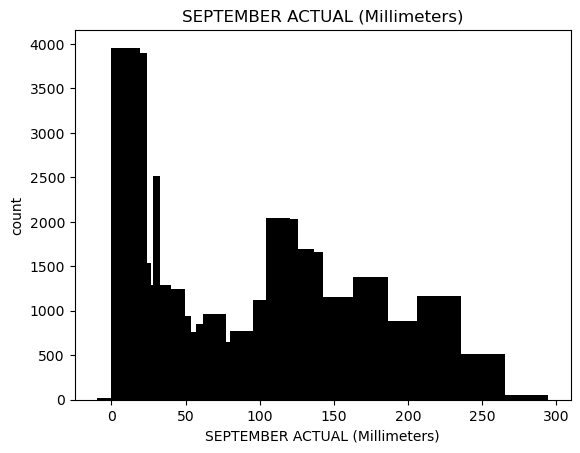

In [132]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
import numpy as np

plt.pyplot.hist(India_train['DECEMBER MAXIMUM (Centigrate)'],color='black')
# set x/y labels and plot title
plt.pyplot.xlabel('DECEMBER MAXIMUM (Centigrate)')
plt.pyplot.ylabel("count")
plt.pyplot.title('DECEMBER MAXIMUM (Centigrate)')

plt.pyplot.hist(India_train['JANUARY WATER DEFICIT (Millimeters)'],color='black')
# set x/y labels and plot title
plt.pyplot.xlabel('JANUARY WATER DEFICIT (Millimeters)')
plt.pyplot.ylabel("count")
plt.pyplot.title('JANUARY WATER DEFICIT (Millimeters)')

plt.pyplot.hist(India_train['FEBRUARY WATER DEFICIT (Millimeters)'],color='black')
# set x/y labels and plot title
plt.pyplot.xlabel('FEBRUARY WATER DEFICIT (Millimeters)')
plt.pyplot.ylabel("count")
plt.pyplot.title('FEBRUARY WATER DEFICIT (Millimeters)')

plt.pyplot.hist(India_train['MARCH WATER DEFICIT (Millimeters)'],color='black')
# set x/y labels and plot title
plt.pyplot.xlabel('MARCH WATER DEFICIT (Millimeters)')
plt.pyplot.ylabel("count")
plt.pyplot.title('MARCH WATER DEFICIT (Millimeters)')

plt.pyplot.hist(India_train['APRIL WATER DEFICIT (Millimeters)'],color='black')
# set x/y labels and plot title
plt.pyplot.xlabel('APRIL WATER DEFICIT (Millimeters)')
plt.pyplot.ylabel("count")
plt.pyplot.title('APRIL WATER DEFICIT (Millimeters)')

plt.pyplot.hist(India_train['MAY WATER DEFICIT (Millimeters)'],color='black')
# set x/y labels and plot title
plt.pyplot.xlabel('MAY WATER DEFICIT (Millimeters)')
plt.pyplot.ylabel("count")
plt.pyplot.title('MAY WATER DEFICIT (Millimeters)')

plt.pyplot.hist(India_train['JUNE WATER DEFICIT (Millimeters)'],color='black')
# set x/y labels and plot title
plt.pyplot.xlabel('JUNE WATER DEFICIT (Millimeters)')
plt.pyplot.ylabel("count")
plt.pyplot.title('JUNE WATER DEFICIT (Millimeters)')

plt.pyplot.hist(India_train['JULY WATER DEFICIT (Millimeters)'],color='black')
# set x/y labels and plot title
plt.pyplot.xlabel('JULY WATER DEFICIT (Millimeters)')
plt.pyplot.ylabel("count")
plt.pyplot.title('JULY WATER DEFICIT (Millimeters)')

plt.pyplot.hist(India_train['AUGUST WATER DEFICIT (Millimeters)'],color='black')
# set x/y labels and plot title
plt.pyplot.xlabel('AUGUST WATER DEFICIT (Millimeters)')
plt.pyplot.ylabel("count")
plt.pyplot.title('AUGUST WATER DEFICIT (Millimeters)')

plt.pyplot.hist(India_train['OCTOBER WATER DEFICIT (Millimeters)'],color='black')
# set x/y labels and plot title
plt.pyplot.xlabel('OCTOBER WATER DEFICIT (Millimeters)')
plt.pyplot.ylabel("count")
plt.pyplot.title('OCTOBER WATER DEFICIT (Millimeters)')

plt.pyplot.hist(India_train['NOVEMBER WATER DEFICIT (Millimeters)'],color='black')
# set x/y labels and plot title
plt.pyplot.xlabel('NOVEMBER WATER DEFICIT (Millimeters)')
plt.pyplot.ylabel("count")
plt.pyplot.title('NOVEMBER WATER DEFICIT (Millimeters)')

plt.pyplot.hist(India_train['DECEMBER WATER DEFICIT (Millimeters)'],color='black')
# set x/y labels and plot title
plt.pyplot.xlabel('DECEMBER WATER DEFICIT (Millimeters)')
plt.pyplot.ylabel("count")
plt.pyplot.title('DECEMBER WATER DEFICIT (Millimeters)')

plt.pyplot.hist(India_train['JANUARY ACTUAL (Millimeters)'],color='black')
# set x/y labels and plot title
plt.pyplot.xlabel('JANUARY ACTUAL (Millimeters)')
plt.pyplot.ylabel("count")
plt.pyplot.title('JANUARY ACTUAL (Millimeters)')

plt.pyplot.hist(India_train['FEBRUARY ACTUAL (Millimeters)'],color='black')
# set x/y labels and plot title
plt.pyplot.xlabel('FEBRUARY ACTUAL (Millimeters)')
plt.pyplot.ylabel("count")
plt.pyplot.title('FEBRUARY ACTUAL (Millimeters)')

plt.pyplot.hist(India_train['MARCH ACTUAL (Millimeters)'],color='black')
# set x/y labels and plot title
plt.pyplot.xlabel('MARCH ACTUAL (Millimeters)')
plt.pyplot.ylabel("count")
plt.pyplot.title('MARCH ACTUAL (Millimeters)')

plt.pyplot.hist(India_train['APRIL ACTUAL (Millimeters)'],color='black')
# set x/y labels and plot title
plt.pyplot.xlabel('APRIL ACTUAL (Millimeters)')
plt.pyplot.ylabel("count")
plt.pyplot.title('APRIL ACTUAL (Millimeters)')

plt.pyplot.hist(India_train['MAY ACTUAL (Millimeters)'],color='black')
# set x/y labels and plot title
plt.pyplot.xlabel('MAY ACTUAL (Millimeters)')
plt.pyplot.ylabel("count")
plt.pyplot.title('MAY ACTUAL (Millimeters)')

plt.pyplot.hist(India_train['JUNE ACTUAL (Millimeters)'],color='black')
# set x/y labels and plot title
plt.pyplot.xlabel('JUNE ACTUAL (Millimeters)')
plt.pyplot.ylabel("count")
plt.pyplot.title('JUNE ACTUAL (Millimeters)')

plt.pyplot.hist(India_train['JULY ACTUAL (Millimeters)'],color='black')
# set x/y labels and plot title
plt.pyplot.xlabel('JULY ACTUAL (Millimeters)')
plt.pyplot.ylabel("count")
plt.pyplot.title('JULY ACTUAL (Millimeters)')

plt.pyplot.hist(India_train['AUGUST ACTUAL (Millimeters)'],color='black')
# set x/y labels and plot title
plt.pyplot.xlabel('AUGUST ACTUAL (Millimeters)')
plt.pyplot.ylabel("count")
plt.pyplot.title('AUGUST ACTUAL (Millimeters)')

plt.pyplot.hist(India_train['SEPTEMBER ACTUAL (Millimeters)'],color='black')
# set x/y labels and plot title
plt.pyplot.xlabel('SEPTEMBER ACTUAL (Millimeters)')
plt.pyplot.ylabel("count")
plt.pyplot.title('SEPTEMBER ACTUAL (Millimeters)')




In [133]:
India_train=India_train.drop(India_train[India_train['DECEMBER MAXIMUM (Centigrate)']<0.0].index)
India_train=India_train.drop(India_train[India_train['JANUARY WATER DEFICIT (Millimeters)']<0.0].index)
India_train=India_train.drop(India_train[India_train['FEBRUARY WATER DEFICIT (Millimeters)']<0.0].index)
India_train=India_train.drop(India_train[India_train['MARCH WATER DEFICIT (Millimeters)']<0.0].index)
India_train=India_train.drop(India_train[India_train['APRIL WATER DEFICIT (Millimeters)']<0.0].index)
India_train=India_train.drop(India_train[India_train['MAY WATER DEFICIT (Millimeters)']<0.0].index)
India_train=India_train.drop(India_train[India_train['JUNE WATER DEFICIT (Millimeters)']<0.0].index)
India_train=India_train.drop(India_train[India_train['JULY WATER DEFICIT (Millimeters)']<0.0].index)
India_train=India_train.drop(India_train[India_train['AUGUST WATER DEFICIT (Millimeters)']<0.0].index)
India_train=India_train.drop(India_train[India_train['OCTOBER WATER DEFICIT (Millimeters)']<0.0].index)
India_train=India_train.drop(India_train[India_train['NOVEMBER WATER DEFICIT (Millimeters)']<0.0].index)
India_train=India_train.drop(India_train[India_train['DECEMBER WATER DEFICIT (Millimeters)']<0.0].index)
India_train=India_train.drop(India_train[India_train['JANUARY ACTUAL (Millimeters)']<0.0].index)
India_train=India_train.drop(India_train[India_train['FEBRUARY ACTUAL (Millimeters)']<0.0].index)
India_train=India_train.drop(India_train[India_train['MARCH ACTUAL (Millimeters)']<0.0].index)
India_train=India_train.drop(India_train[India_train['APRIL ACTUAL (Millimeters)']<0.0].index)
India_train=India_train.drop(India_train[India_train['MAY ACTUAL (Millimeters)']<0.0].index)
India_train=India_train.drop(India_train[India_train['JUNE ACTUAL (Millimeters)']<0.0].index)
India_train=India_train.drop(India_train[India_train['JULY ACTUAL (Millimeters)']<0.0].index)
India_train=India_train.drop(India_train[India_train['AUGUST ACTUAL (Millimeters)']<0.0].index)
India_train=India_train.drop(India_train[India_train['SEPTEMBER ACTUAL (Millimeters)']<0.0].index)


In [134]:
India_train.shape

(4673, 103)

In [135]:
bins = np.linspace(min(India_train['DECEMBER MAXIMUM (Centigrate)']), max(India_train['DECEMBER MAXIMUM (Centigrate)']), 4)
bins1 = np.linspace(min(India_train['JANUARY WATER DEFICIT (Millimeters)']), max(India_train['JANUARY WATER DEFICIT (Millimeters)']), 4)
bins2 = np.linspace(min(India_train['FEBRUARY WATER DEFICIT (Millimeters)']), max(India_train['FEBRUARY WATER DEFICIT (Millimeters)']), 4)
bins3 = np.linspace(min(India_train['MARCH WATER DEFICIT (Millimeters)']), max(India_train['MARCH WATER DEFICIT (Millimeters)']), 4)
bins4 = np.linspace(min(India_train['APRIL WATER DEFICIT (Millimeters)']), max(India_train['APRIL WATER DEFICIT (Millimeters)']), 4)
bins5 = np.linspace(min(India_train['MAY WATER DEFICIT (Millimeters)']), max(India_train['MAY WATER DEFICIT (Millimeters)']), 4)
bins6 = np.linspace(min(India_train['JUNE WATER DEFICIT (Millimeters)']), max(India_train['JUNE WATER DEFICIT (Millimeters)']), 4)
bins7 = np.linspace(min(India_train['JULY WATER DEFICIT (Millimeters)']), max(India_train['JULY WATER DEFICIT (Millimeters)']), 4)
bins8 = np.linspace(min(India_train['AUGUST WATER DEFICIT (Millimeters)']), max(India_train['AUGUST WATER DEFICIT (Millimeters)']), 4)
bins9 = np.linspace(min(India_train['OCTOBER WATER DEFICIT (Millimeters)']), max(India_train['OCTOBER WATER DEFICIT (Millimeters)']), 4)
bins10 = np.linspace(min(India_train['NOVEMBER WATER DEFICIT (Millimeters)']), max(India_train['NOVEMBER WATER DEFICIT (Millimeters)']), 4)
bins11 = np.linspace(min(India_train['DECEMBER WATER DEFICIT (Millimeters)']), max(India_train['DECEMBER WATER DEFICIT (Millimeters)']), 4)
bins12 = np.linspace(min(India_train['JANUARY ACTUAL (Millimeters)']), max(India_train['JANUARY ACTUAL (Millimeters)']), 4)
bins13 = np.linspace(min(India_train['FEBRUARY ACTUAL (Millimeters)']), max(India_train['FEBRUARY ACTUAL (Millimeters)']), 4)
bins14 = np.linspace(min(India_train['MARCH ACTUAL (Millimeters)']), max(India_train['MARCH ACTUAL (Millimeters)']), 4)
bins15 = np.linspace(min(India_train['APRIL ACTUAL (Millimeters)']), max(India_train['APRIL ACTUAL (Millimeters)']), 4)
bins16 = np.linspace(min(India_train['MAY ACTUAL (Millimeters)']), max(India_train['MAY ACTUAL (Millimeters)']), 4)
bins17 = np.linspace(min(India_train['JUNE ACTUAL (Millimeters)']), max(India_train['JUNE ACTUAL (Millimeters)']), 4)
bins18 = np.linspace(min(India_train['JULY ACTUAL (Millimeters)']), max(India_train['JULY ACTUAL (Millimeters)']), 4)
bins19 = np.linspace(min(India_train['AUGUST ACTUAL (Millimeters)']), max(India_train['AUGUST ACTUAL (Millimeters)']), 4)
bins20 = np.linspace(min(India_train['SEPTEMBER ACTUAL (Millimeters)']), max(India_train['SEPTEMBER ACTUAL (Millimeters)']), 4)
group_names = ['Low', 'Medium', 'High']

In [136]:
India_train['DECEMBER MAXIMUM (Centigrate)-binned'] = pd.cut(India_train['DECEMBER MAXIMUM (Centigrate)'], bins, labels=group_names, include_lowest=True)
India_train['JANUARY WATER DEFICIT (Millimeters)-binned'] = pd.cut(India_train['JANUARY WATER DEFICIT (Millimeters)'], bins1, labels=group_names, include_lowest=True)
India_train['FEBRUARY WATER DEFICIT (Millimeters)-binned'] = pd.cut(India_train['FEBRUARY WATER DEFICIT (Millimeters)'], bins2, labels=group_names, include_lowest=True)
India_train['MARCH WATER DEFICIT (Millimeters)-binned'] = pd.cut(India_train['MARCH WATER DEFICIT (Millimeters)'], bins3, labels=group_names, include_lowest=True)
India_train['APRIL WATER DEFICIT (Millimeters)-binned'] = pd.cut(India_train['APRIL WATER DEFICIT (Millimeters)'], bins4, labels=group_names, include_lowest=True)
India_train['MAY WATER DEFICIT (Millimeters)-binned'] = pd.cut(India_train['MAY WATER DEFICIT (Millimeters)'], bins5, labels=group_names, include_lowest=True)
India_train['JUNE WATER DEFICIT (Millimeters)-binned'] = pd.cut(India_train['JUNE WATER DEFICIT (Millimeters)'], bins6, labels=group_names, include_lowest=True)
India_train['JULY WATER DEFICIT (Millimeters)-binned'] = pd.cut(India_train['JULY WATER DEFICIT (Millimeters)'], bins7, labels=group_names, include_lowest=True)
India_train['AUGUST WATER DEFICIT (Millimeters)-binned'] = pd.cut(India_train['AUGUST WATER DEFICIT (Millimeters)'], bins8, labels=group_names, include_lowest=True)
India_train['OCTOBER WATER DEFICIT (Millimeters)-binned'] = pd.cut(India_train['OCTOBER WATER DEFICIT (Millimeters)'], bins9, labels=group_names, include_lowest=True)
India_train['NOVEMBER WATER DEFICIT (Millimeters)-binned'] = pd.cut(India_train['NOVEMBER WATER DEFICIT (Millimeters)'], bins10, labels=group_names, include_lowest=True)
India_train['DECEMBER WATER DEFICIT (Millimeters)-binned'] = pd.cut(India_train['DECEMBER WATER DEFICIT (Millimeters)'], bins11, labels=group_names, include_lowest=True)
India_train['JANUARY ACTUAL (Millimeters)-binned'] = pd.cut(India_train['JANUARY ACTUAL (Millimeters)'], bins12, labels=group_names, include_lowest=True)
India_train['FEBRUARY ACTUAL (Millimeters)-binned'] = pd.cut(India_train['FEBRUARY ACTUAL (Millimeters)'], bins13, labels=group_names, include_lowest=True)
India_train['MARCH ACTUAL (Millimeters)-binned'] = pd.cut(India_train['MARCH ACTUAL (Millimeters)'], bins14, labels=group_names, include_lowest=True)
India_train['APRIL ACTUAL (Millimeters)-binned'] = pd.cut(India_train['APRIL ACTUAL (Millimeters)'], bins15, labels=group_names, include_lowest=True)
India_train['MAY ACTUAL (Millimeters)-binned'] = pd.cut(India_train['MAY ACTUAL (Millimeters)'], bins16, labels=group_names, include_lowest=True)
India_train['JUNE ACTUAL (Millimeters)-binned'] = pd.cut(India_train['JUNE ACTUAL (Millimeters)'], bins17, labels=group_names, include_lowest=True)
India_train['JULY ACTUAL (Millimeters)-binned'] = pd.cut(India_train['JULY ACTUAL (Millimeters)'], bins18, labels=group_names, include_lowest=True)
India_train['AUGUST ACTUAL (Millimeters)-binned'] = pd.cut(India_train['AUGUST ACTUAL (Millimeters)'], bins19, labels=group_names, include_lowest=True)
India_train['SEPTEMBER ACTUAL (Millimeters)-binned'] = pd.cut(India_train['SEPTEMBER ACTUAL (Millimeters)'], bins20, labels=group_names, include_lowest=True)



In [137]:
India_train[['DECEMBER MAXIMUM (Centigrate)','DECEMBER MAXIMUM (Centigrate)-binned']].head(20)
India_train["DECEMBER MAXIMUM (Centigrate)-binned"].value_counts().idxmax()

India_train[['JANUARY WATER DEFICIT (Millimeters)','JANUARY WATER DEFICIT (Millimeters)-binned']].head(20)
India_train["JANUARY WATER DEFICIT (Millimeters)-binned"].value_counts().idxmax()

India_train[['FEBRUARY WATER DEFICIT (Millimeters)','FEBRUARY WATER DEFICIT (Millimeters)-binned']].head(20)
India_train["FEBRUARY WATER DEFICIT (Millimeters)-binned"].value_counts().idxmax()

India_train[['MARCH WATER DEFICIT (Millimeters)','MARCH WATER DEFICIT (Millimeters)-binned']].head(20)
India_train["MARCH WATER DEFICIT (Millimeters)-binned"].value_counts().idxmax()

India_train[['APRIL WATER DEFICIT (Millimeters)','APRIL WATER DEFICIT (Millimeters)-binned']].head(20)
India_train["APRIL WATER DEFICIT (Millimeters)-binned"].value_counts().idxmax()

India_train[['MAY WATER DEFICIT (Millimeters)','MAY WATER DEFICIT (Millimeters)-binned']].head(20)
India_train["MAY WATER DEFICIT (Millimeters)-binned"].value_counts().idxmax()

India_train[['JUNE WATER DEFICIT (Millimeters)','JUNE WATER DEFICIT (Millimeters)-binned']].head(20)
India_train["JUNE WATER DEFICIT (Millimeters)-binned"].value_counts().idxmax()

India_train[['JULY WATER DEFICIT (Millimeters)','JULY WATER DEFICIT (Millimeters)-binned']].head(20)
India_train["JULY WATER DEFICIT (Millimeters)-binned"].value_counts().idxmax()

India_train[['AUGUST WATER DEFICIT (Millimeters)','AUGUST WATER DEFICIT (Millimeters)-binned']].head(20)
India_train["AUGUST WATER DEFICIT (Millimeters)-binned"].value_counts().idxmax()

India_train[['OCTOBER WATER DEFICIT (Millimeters)','OCTOBER WATER DEFICIT (Millimeters)-binned']].head(20)
India_train["OCTOBER WATER DEFICIT (Millimeters)-binned"].value_counts().idxmax()

India_train[['NOVEMBER WATER DEFICIT (Millimeters)','NOVEMBER WATER DEFICIT (Millimeters)-binned']].head(20)
India_train["NOVEMBER WATER DEFICIT (Millimeters)-binned"].value_counts().idxmax()

India_train[['DECEMBER WATER DEFICIT (Millimeters)','DECEMBER WATER DEFICIT (Millimeters)-binned']].head(20)
India_train["DECEMBER WATER DEFICIT (Millimeters)-binned"].value_counts().idxmax()

India_train[['JANUARY ACTUAL (Millimeters)','JANUARY ACTUAL (Millimeters)-binned']].head(20)
India_train["JANUARY ACTUAL (Millimeters)-binned"].value_counts().idxmax()

India_train[['FEBRUARY ACTUAL (Millimeters)','FEBRUARY ACTUAL (Millimeters)-binned']].head(20)
India_train["FEBRUARY ACTUAL (Millimeters)-binned"].value_counts().idxmax()

India_train[['MARCH ACTUAL (Millimeters)','MARCH ACTUAL (Millimeters)-binned']].head(20)
India_train["MARCH ACTUAL (Millimeters)-binned"].value_counts().idxmax()

India_train[['APRIL ACTUAL (Millimeters)','APRIL ACTUAL (Millimeters)-binned']].head(20)
India_train["APRIL ACTUAL (Millimeters)-binned"].value_counts().idxmax()

India_train[['MAY ACTUAL (Millimeters)','MAY ACTUAL (Millimeters)-binned']].head(20)
India_train["MAY ACTUAL (Millimeters)-binned"].value_counts().idxmax()

India_train[['JUNE ACTUAL (Millimeters)','JUNE ACTUAL (Millimeters)-binned']].head(20)
India_train["JUNE ACTUAL (Millimeters)-binned"].value_counts().idxmax()

India_train[['JULY ACTUAL (Millimeters)','JULY ACTUAL (Millimeters)-binned']].head(20)
India_train["JULY ACTUAL (Millimeters)-binned"].value_counts().idxmax()

India_train[['AUGUST ACTUAL (Millimeters)','AUGUST ACTUAL (Millimeters)-binned']].head(20)
India_train["AUGUST ACTUAL (Millimeters)-binned"].value_counts().idxmax()

India_train[['SEPTEMBER ACTUAL (Millimeters)','SEPTEMBER ACTUAL (Millimeters)-binned']].head(20)
India_train["SEPTEMBER ACTUAL (Millimeters)-binned"].value_counts().idxmax()

India_train.dtypes

Year                                        int64
State Name                                 object
Dist Name                                  object
COTTON AREA (1000 ha)                     float64
COTTON PRODUCTION (1000 tons)             float64
                                           ...   
MAY ACTUAL (Millimeters)-binned          category
JUNE ACTUAL (Millimeters)-binned         category
JULY ACTUAL (Millimeters)-binned         category
AUGUST ACTUAL (Millimeters)-binned       category
SEPTEMBER ACTUAL (Millimeters)-binned    category
Length: 124, dtype: object

Text(0.5, 1.0, 'DECEMBER MAXIMUM (Centigrate)-binned')

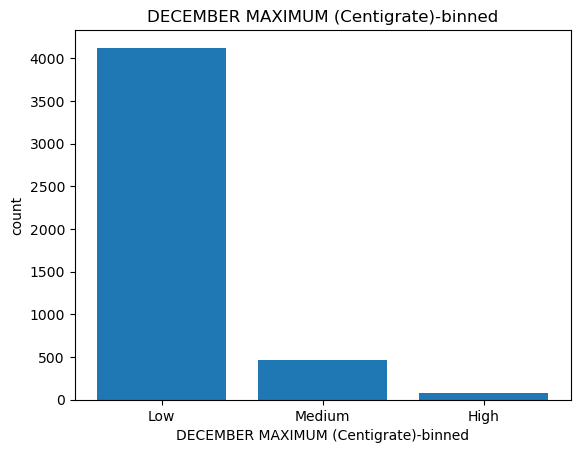

In [138]:
pyplot.bar(group_names, India_train["DECEMBER MAXIMUM (Centigrate)-binned"].value_counts())
# set x/y labels and plot title
plt.pyplot.xlabel("DECEMBER MAXIMUM (Centigrate)-binned")
plt.pyplot.ylabel("count")
plt.pyplot.title("DECEMBER MAXIMUM (Centigrate)-binned")

Text(0.5, 1.0, 'JANUARY WATER DEFICIT (Millimeters)-binned')

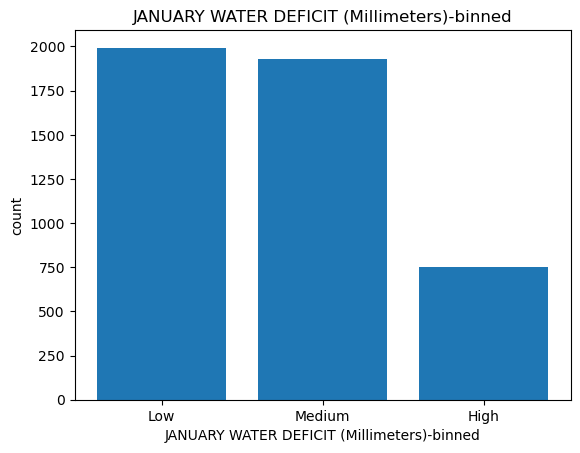

In [139]:
pyplot.bar(group_names, India_train["JANUARY WATER DEFICIT (Millimeters)-binned"].value_counts())
# set x/y labels and plot title
plt.pyplot.xlabel("JANUARY WATER DEFICIT (Millimeters)-binned")
plt.pyplot.ylabel("count")
plt.pyplot.title("JANUARY WATER DEFICIT (Millimeters)-binned")

Text(0.5, 1.0, 'FEBRUARY WATER DEFICIT (Millimeters)-binned')

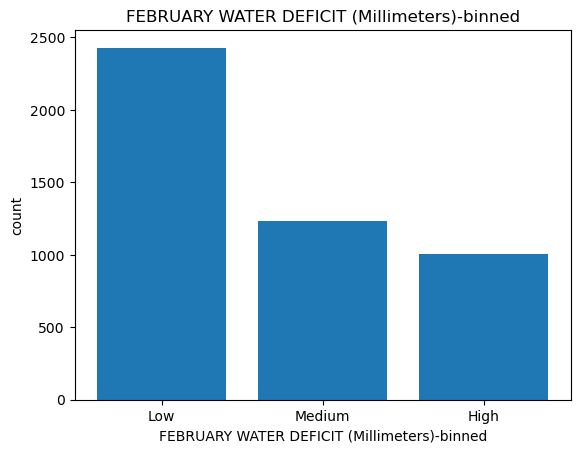

In [140]:
pyplot.bar(group_names, India_train["FEBRUARY WATER DEFICIT (Millimeters)-binned"].value_counts())
# set x/y labels and plot title
plt.pyplot.xlabel("FEBRUARY WATER DEFICIT (Millimeters)-binned")
plt.pyplot.ylabel("count")
plt.pyplot.title("FEBRUARY WATER DEFICIT (Millimeters)-binned")

Text(0.5, 1.0, 'MARCH WATER DEFICIT (Millimeters)-binned')

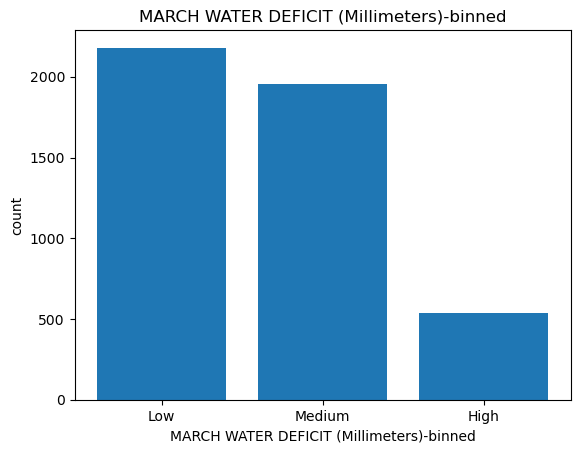

In [141]:
pyplot.bar(group_names, India_train["MARCH WATER DEFICIT (Millimeters)-binned"].value_counts())
# set x/y labels and plot title
plt.pyplot.xlabel("MARCH WATER DEFICIT (Millimeters)-binned")
plt.pyplot.ylabel("count")
plt.pyplot.title("MARCH WATER DEFICIT (Millimeters)-binned")

Text(0.5, 1.0, 'APRIL WATER DEFICIT (Millimeters)-binned')

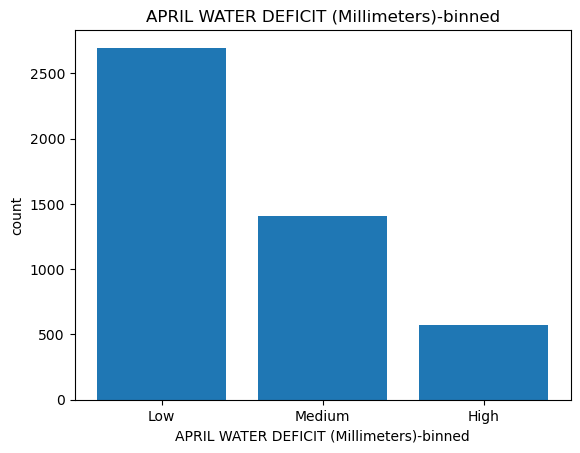

In [142]:
pyplot.bar(group_names, India_train["APRIL WATER DEFICIT (Millimeters)-binned"].value_counts())
# set x/y labels and plot title
plt.pyplot.xlabel("APRIL WATER DEFICIT (Millimeters)-binned")
plt.pyplot.ylabel("count")
plt.pyplot.title("APRIL WATER DEFICIT (Millimeters)-binned")

Text(0.5, 1.0, 'MAY WATER DEFICIT (Millimeters)-binned')

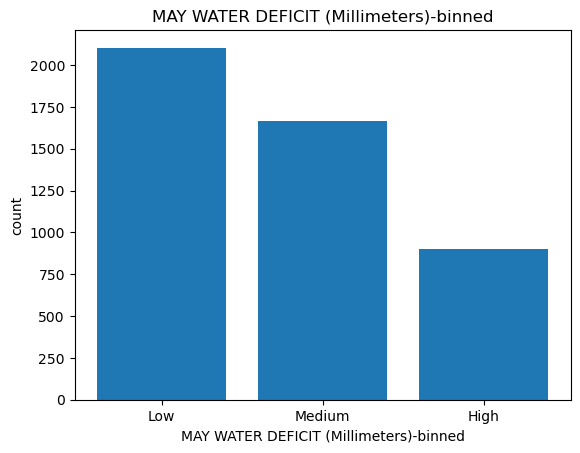

In [143]:
pyplot.bar(group_names, India_train["MAY WATER DEFICIT (Millimeters)-binned"].value_counts())
# set x/y labels and plot title
plt.pyplot.xlabel("MAY WATER DEFICIT (Millimeters)-binned")
plt.pyplot.ylabel("count")
plt.pyplot.title("MAY WATER DEFICIT (Millimeters)-binned")

Text(0.5, 1.0, 'JUNE WATER DEFICIT (Millimeters)-binned')

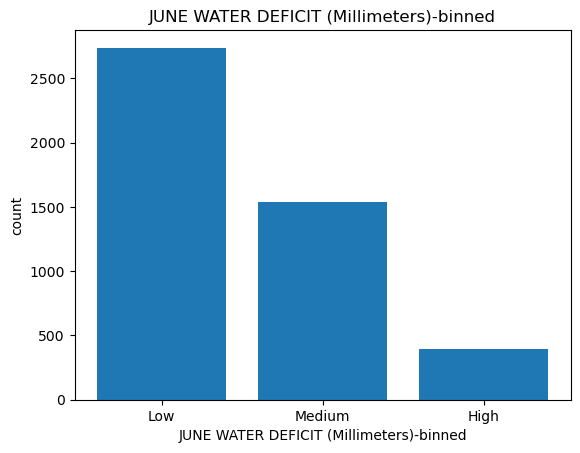

In [144]:
pyplot.bar(group_names, India_train["JUNE WATER DEFICIT (Millimeters)-binned"].value_counts())
# set x/y labels and plot title
plt.pyplot.xlabel("JUNE WATER DEFICIT (Millimeters)-binned")
plt.pyplot.ylabel("count")
plt.pyplot.title("JUNE WATER DEFICIT (Millimeters)-binned")

Text(0.5, 1.0, 'JULY WATER DEFICIT (Millimeters)-binned')

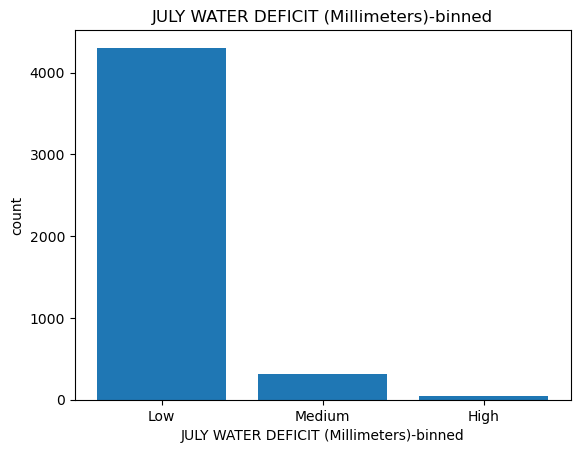

In [145]:
pyplot.bar(group_names, India_train["JULY WATER DEFICIT (Millimeters)-binned"].value_counts())
# set x/y labels and plot title
plt.pyplot.xlabel("JULY WATER DEFICIT (Millimeters)-binned")
plt.pyplot.ylabel("count")
plt.pyplot.title("JULY WATER DEFICIT (Millimeters)-binned")

Text(0.5, 1.0, 'AUGUST WATER DEFICIT (Millimeters)-binned')

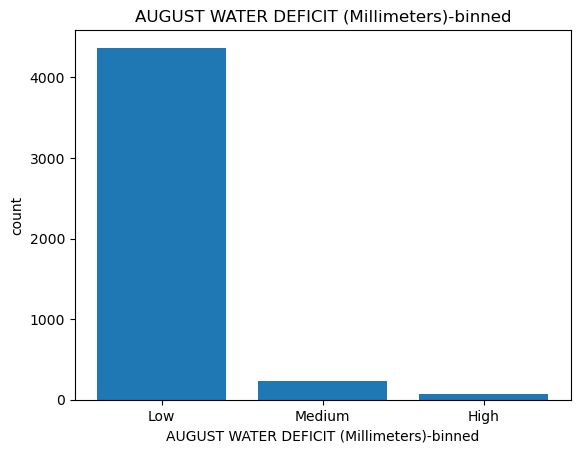

In [146]:
pyplot.bar(group_names, India_train["AUGUST WATER DEFICIT (Millimeters)-binned"].value_counts())
# set x/y labels and plot title
plt.pyplot.xlabel("AUGUST WATER DEFICIT (Millimeters)-binned")
plt.pyplot.ylabel("count")
plt.pyplot.title("AUGUST WATER DEFICIT (Millimeters)-binned")

Text(0.5, 1.0, 'OCTOBER WATER DEFICIT (Millimeters)-binned')

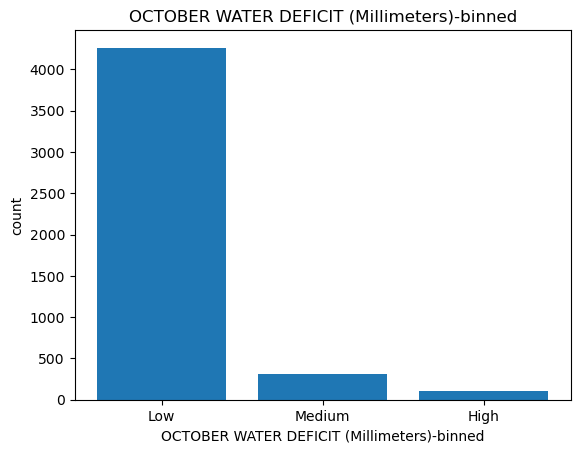

In [147]:
pyplot.bar(group_names, India_train["OCTOBER WATER DEFICIT (Millimeters)-binned"].value_counts())
# set x/y labels and plot title
plt.pyplot.xlabel("OCTOBER WATER DEFICIT (Millimeters)-binned")
plt.pyplot.ylabel("count")
plt.pyplot.title("OCTOBER WATER DEFICIT (Millimeters)-binned")

Text(0.5, 1.0, 'NOVEMBER WATER DEFICIT (Millimeters)-binned')

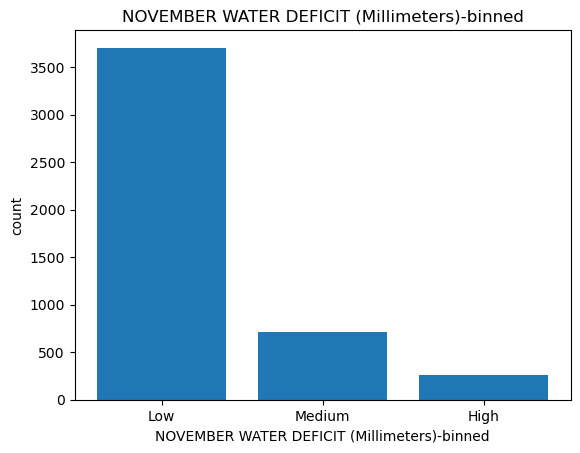

In [148]:
pyplot.bar(group_names, India_train["NOVEMBER WATER DEFICIT (Millimeters)-binned"].value_counts())
# set x/y labels and plot title
plt.pyplot.xlabel("NOVEMBER WATER DEFICIT (Millimeters)-binned")
plt.pyplot.ylabel("count")
plt.pyplot.title("NOVEMBER WATER DEFICIT (Millimeters)-binned")

Text(0.5, 1.0, 'DECEMBER WATER DEFICIT (Millimeters)-binned')

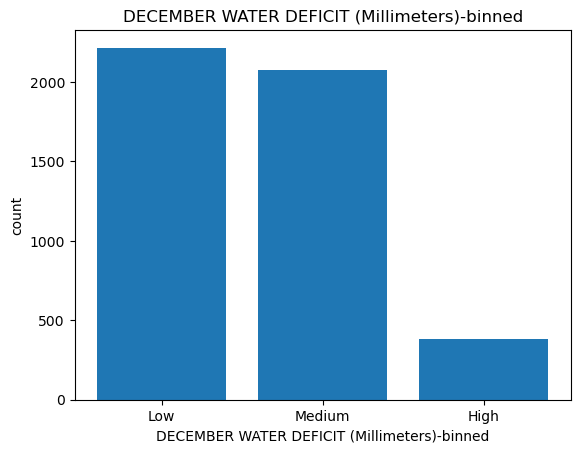

In [149]:
pyplot.bar(group_names, India_train["DECEMBER WATER DEFICIT (Millimeters)-binned"].value_counts())
# set x/y labels and plot title
plt.pyplot.xlabel("DECEMBER WATER DEFICIT (Millimeters)-binned")
plt.pyplot.ylabel("count")
plt.pyplot.title("DECEMBER WATER DEFICIT (Millimeters)-binned")

Text(0.5, 1.0, 'JANUARY ACTUAL (Millimeters)-binned')

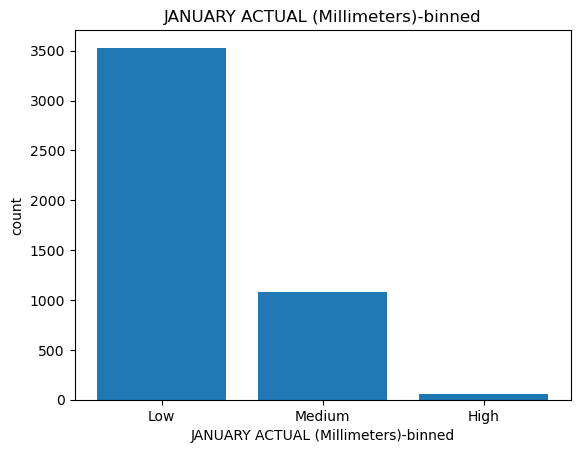

In [150]:
pyplot.bar(group_names, India_train["JANUARY ACTUAL (Millimeters)-binned"].value_counts())
# set x/y labels and plot title
plt.pyplot.xlabel("JANUARY ACTUAL (Millimeters)-binned")
plt.pyplot.ylabel("count")
plt.pyplot.title("JANUARY ACTUAL (Millimeters)-binned")

Text(0.5, 1.0, 'FEBRUARY ACTUAL (Millimeters)-binned')

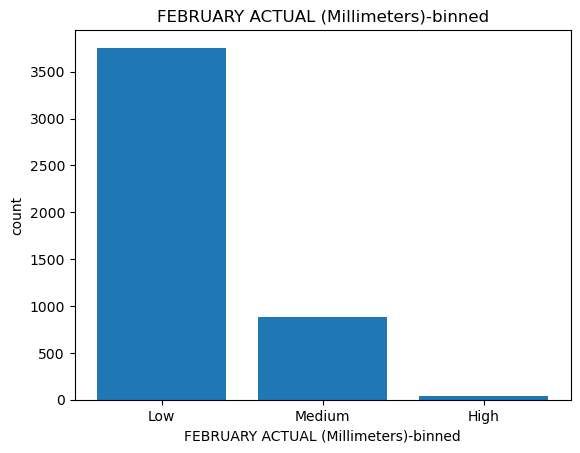

In [151]:
pyplot.bar(group_names, India_train["FEBRUARY ACTUAL (Millimeters)-binned"].value_counts())
# set x/y labels and plot title
plt.pyplot.xlabel("FEBRUARY ACTUAL (Millimeters)-binned")
plt.pyplot.ylabel("count")
plt.pyplot.title("FEBRUARY ACTUAL (Millimeters)-binned")

Text(0.5, 1.0, 'MARCH ACTUAL (Millimeters)-binned')

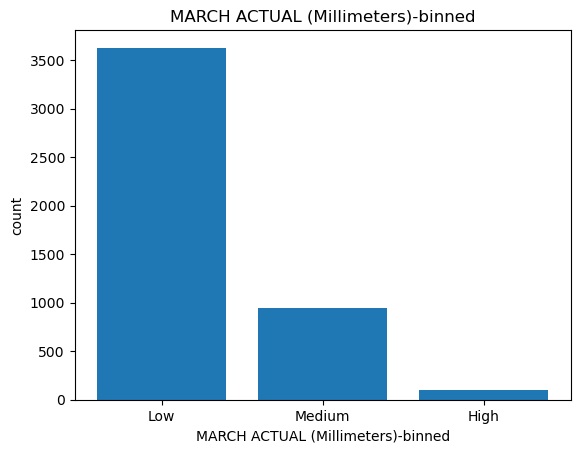

In [152]:
pyplot.bar(group_names, India_train["MARCH ACTUAL (Millimeters)-binned"].value_counts())
# set x/y labels and plot title
plt.pyplot.xlabel("MARCH ACTUAL (Millimeters)-binned")
plt.pyplot.ylabel("count")
plt.pyplot.title("MARCH ACTUAL (Millimeters)-binned")

Text(0.5, 1.0, 'APRIL ACTUAL (Millimeters)-binned')

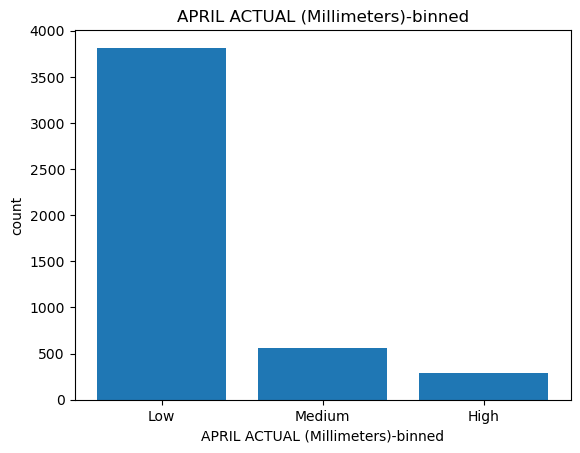

In [153]:
pyplot.bar(group_names, India_train["APRIL ACTUAL (Millimeters)-binned"].value_counts())
# set x/y labels and plot title
plt.pyplot.xlabel("APRIL ACTUAL (Millimeters)-binned")
plt.pyplot.ylabel("count")
plt.pyplot.title("APRIL ACTUAL (Millimeters)-binned")

Text(0.5, 1.0, 'MAY ACTUAL (Millimeters)-binned')

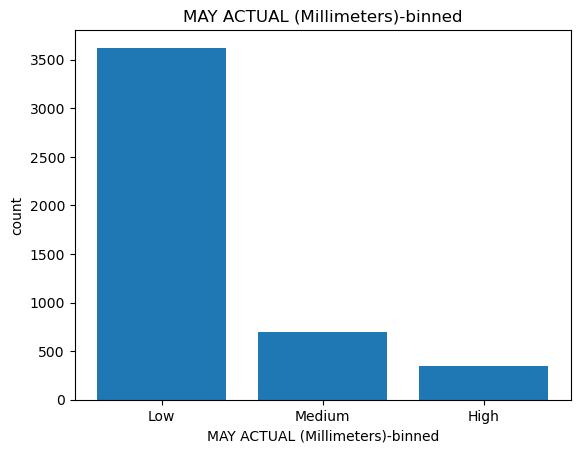

In [154]:
pyplot.bar(group_names, India_train["MAY ACTUAL (Millimeters)-binned"].value_counts())
# set x/y labels and plot title
plt.pyplot.xlabel("MAY ACTUAL (Millimeters)-binned")
plt.pyplot.ylabel("count")
plt.pyplot.title("MAY ACTUAL (Millimeters)-binned")

Text(0.5, 1.0, 'JUNE ACTUAL (Millimeters)-binned')

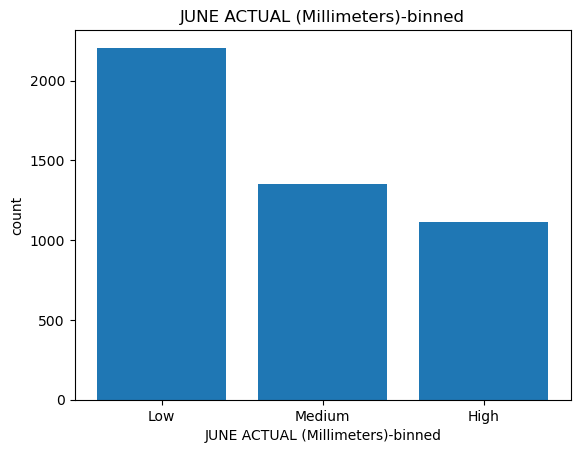

In [155]:
pyplot.bar(group_names, India_train["JUNE ACTUAL (Millimeters)-binned"].value_counts())
# set x/y labels and plot title
plt.pyplot.xlabel("JUNE ACTUAL (Millimeters)-binned")
plt.pyplot.ylabel("count")
plt.pyplot.title("JUNE ACTUAL (Millimeters)-binned")

Text(0.5, 1.0, 'JULY ACTUAL (Millimeters)-binned')

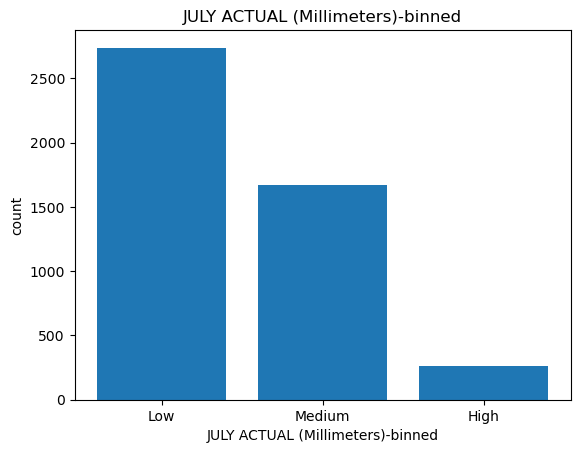

In [156]:
pyplot.bar(group_names, India_train["JULY ACTUAL (Millimeters)-binned"].value_counts())
# set x/y labels and plot title
plt.pyplot.xlabel("JULY ACTUAL (Millimeters)-binned")
plt.pyplot.ylabel("count")
plt.pyplot.title("JULY ACTUAL (Millimeters)-binned")

Text(0.5, 1.0, 'AUGUST ACTUAL (Millimeters)-binned')

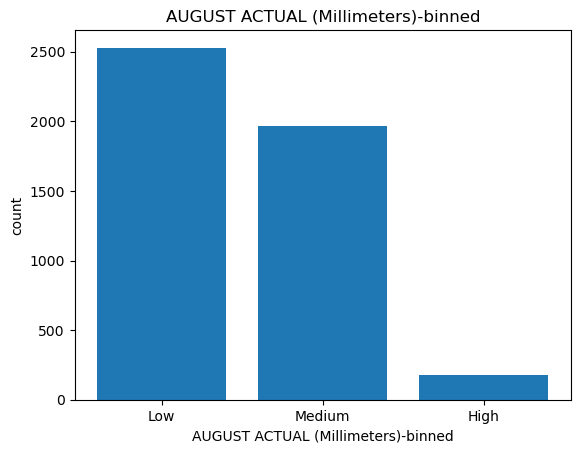

In [157]:
pyplot.bar(group_names, India_train["AUGUST ACTUAL (Millimeters)-binned"].value_counts())
# set x/y labels and plot title
plt.pyplot.xlabel("AUGUST ACTUAL (Millimeters)-binned")
plt.pyplot.ylabel("count")
plt.pyplot.title("AUGUST ACTUAL (Millimeters)-binned")

Text(0.5, 1.0, 'SEPTEMBER ACTUAL (Millimeters)-binned')

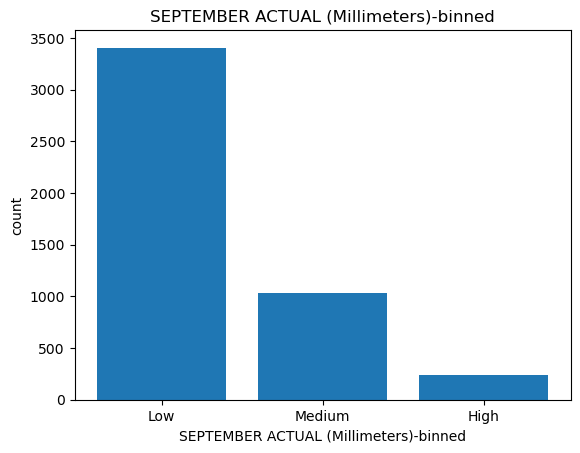

In [158]:
pyplot.bar(group_names, India_train["SEPTEMBER ACTUAL (Millimeters)-binned"].value_counts())
# set x/y labels and plot title
plt.pyplot.xlabel("SEPTEMBER ACTUAL (Millimeters)-binned")
plt.pyplot.ylabel("count")
plt.pyplot.title("SEPTEMBER ACTUAL (Millimeters)-binned")